# Problem Statement

Develop a model to predict customer churn for a subscription-based service or business. Use historical customer data, including features like usage behavior and customer demographics, and try algorithms like Logistic Regression, Random Forests, or Gradient Boosting to predict churn.

[Customer Churn | Kaggle](https://www.kaggle.com/datasets/shantanudhakadd/bank-customer-churn-prediction)

# Problem Solution

1. Overview
2. Data Preprocessing
3. Exploratory Data Analysis
4. Feature Engineering
5. Model Training and Selection

# Overview

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings("ignore")
plt.style.use('fivethirtyeight')

In [2]:
link = 'https://raw.githubusercontent.com/daaanishhh002/CodSoft/main/customer_churn.csv'
df = pd.read_csv(link)

df.sample(5)

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
9510,9511,15735849,Kanayochukwu,617,France,Female,26,2,165947.99,2,0,1,168834.38,0
4840,4841,15691647,McGregor,411,France,Female,35,2,0.00,2,1,1,93825.78,0
9167,9168,15645353,Chubb,607,France,Male,26,1,0.00,1,1,0,29818.20,0
4880,4881,15611580,Wood,751,Spain,Male,33,4,79281.61,1,1,0,117547.76,0
3670,3671,15660809,Loving,850,France,Male,28,4,0.00,2,1,1,12409.01,0


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


In [4]:
df.describe()

,RowNumber,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,10000.00000,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,5000.50000,1.569094e+07,650.528800,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,2886.89568,7.193619e+04,96.653299,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,1.00000,1.556570e+07,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,2500.75000,1.562853e+07,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,5000.50000,1.569074e+07,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,7500.25000,1.575323e+07,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000
max,10000.00000,1.581569e+07,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000


In [5]:
df.describe(include='object')

,Surname,Geography,Gender
count,10000,10000,10000
unique,2932,3,2
top,Smith,France,Male
freq,32,5014,5457


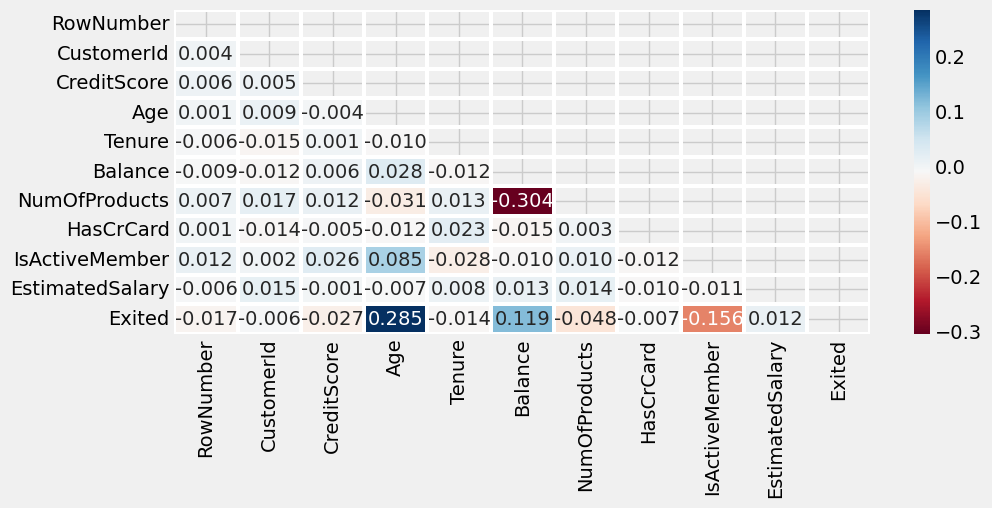

In [6]:
fig, ax = plt.subplots(1,1,figsize=(10,4))
corr = df.corr(numeric_only=True)
mask = np.triu(corr)

sns.heatmap(data=corr,mask=mask,annot=True,fmt='.3f',
            linewidths=1.5,ax=ax,cmap='RdBu');

# Data Preprocessing

In [7]:
df = df.drop(columns=['RowNumber','CustomerId','Surname'])
df.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [11]:
df[['HasCrCard','IsActiveMember','Exited']] = df[
    ['HasCrCard','IsActiveMember','Exited']
].applymap(lambda x:'Yes' if x == 1 else 'No')

In [12]:
df

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2,0.00,1,Yes,Yes,101348.88,Yes
1,608,Spain,Female,41,1,83807.86,1,No,Yes,112542.58,No
2,502,France,Female,42,8,159660.80,3,Yes,No,113931.57,Yes
3,699,France,Female,39,1,0.00,2,No,No,93826.63,No
4,850,Spain,Female,43,2,125510.82,1,Yes,Yes,79084.10,No
...,...,...,...,...,...,...,...,...,...,...,...
9995,771,France,Male,39,5,0.00,2,Yes,No,96270.64,No
9996,516,France,Male,35,10,57369.61,1,Yes,Yes,101699.77,No
9997,709,France,Female,36,7,0.00,1,No,Yes,42085.58,Yes
9998,772,Germany,Male,42,3,75075.31,2,Yes,No,92888.52,Yes


#### Observations

- `CreditScore` `Age` `Balance` `EstimatedSalary` are numerical columns.
- `Geography` `Gender` `Tenure` `NumOfProducts` `HasCrCard`	`IsActiveMember` are categorical columns including target column `Exited`.
- `Age` `Balance` `NumOfProducts` `IsActiveMember` is correlated with target.
- All columns are scaled very differently.

# Exploratory Data Analysis

## Univariate Analysis

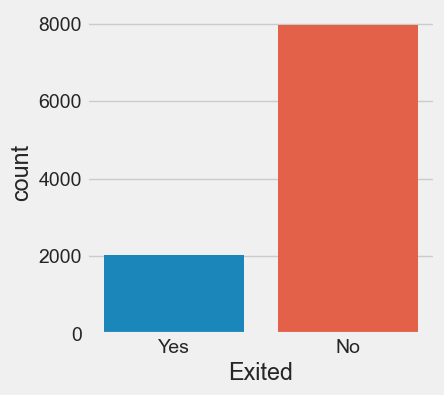

In [20]:
# target variable
plt.figure(figsize=(4,4))
sns.countplot(data=df,x='Exited');

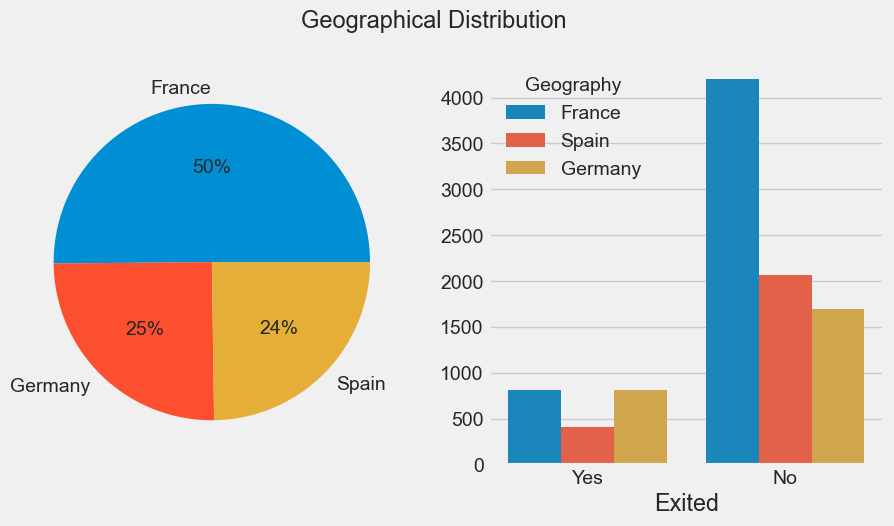

In [21]:
fig, (ax1, ax2) = plt.subplots(1,2,figsize=(10,5))
fig.suptitle('Geographical Distribution',fontsize=17)

# pie chart
df['Geography'].value_counts().plot(kind='pie',ax=ax1,autopct='%d%%')
ax1.set_ylabel('')

# bar chart
sns.countplot(data=df,x='Exited',hue='Geography',ax=ax2)
ax2.set_ylabel('');

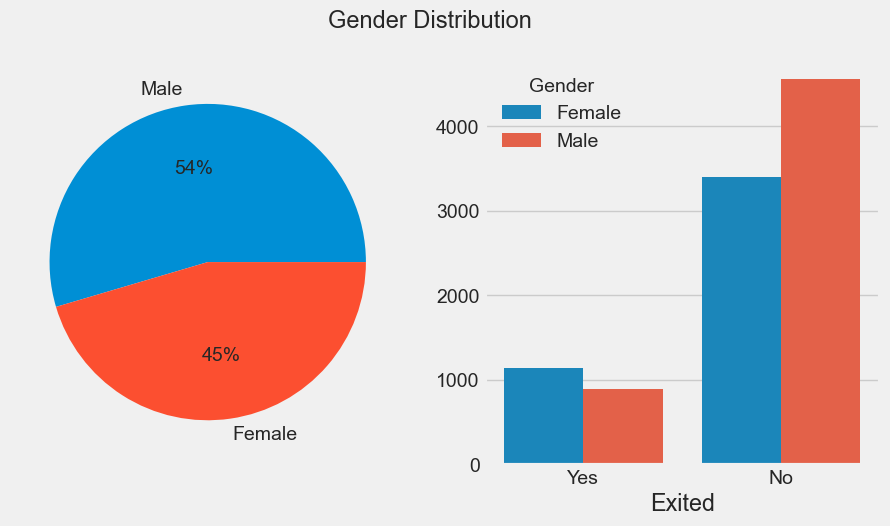

In [22]:
fig, (ax1, ax2) = plt.subplots(1,2,figsize=(10,5))
fig.suptitle('Gender Distribution',fontsize=17)

# pie chart
df['Gender'].value_counts().plot(kind='pie',ax=ax1,autopct='%d%%')
ax1.set_ylabel('')

# bar chart
sns.countplot(data=df,x='Exited',hue='Gender',ax=ax2)
ax2.set_ylabel('');

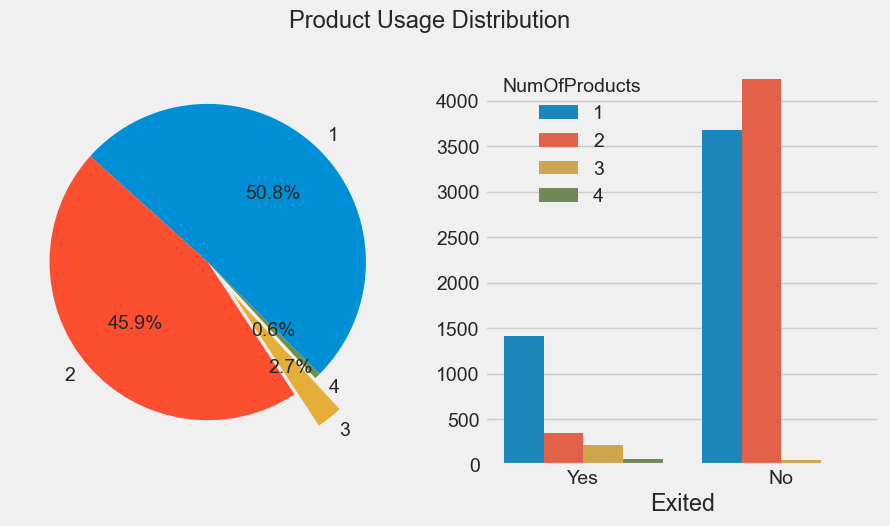

In [23]:
fig, (ax1, ax2) = plt.subplots(1,2,figsize=(10,5))
fig.suptitle('Product Usage Distribution',fontsize=17)

# pie chart
df['NumOfProducts'].value_counts().plot(kind='pie',ax=ax1,autopct='%.1f%%',
                                        explode=[0,0,0.25,0],startangle=-45)
ax1.set_ylabel('')

# bar chart
sns.countplot(data=df,x='Exited',hue='NumOfProducts',ax=ax2)
ax2.set_ylabel('');

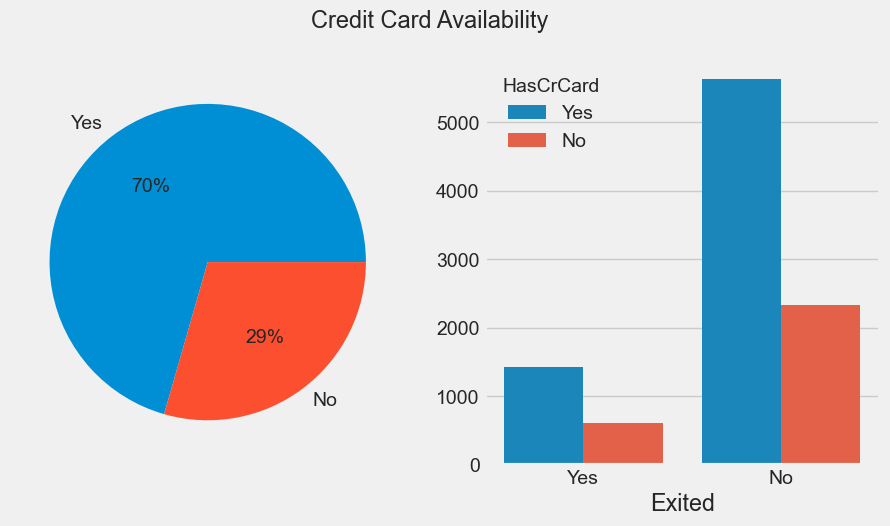

In [24]:
fig, (ax1, ax2) = plt.subplots(1,2,figsize=(10,5))
fig.suptitle('Credit Card Availability',fontsize=17)

# pie chart
df['HasCrCard'].value_counts().plot(kind='pie',ax=ax1,autopct='%d%%')
ax1.set_ylabel('')

# bar chart
sns.countplot(data=df,x='Exited',hue='HasCrCard',ax=ax2)
ax2.set_ylabel('');

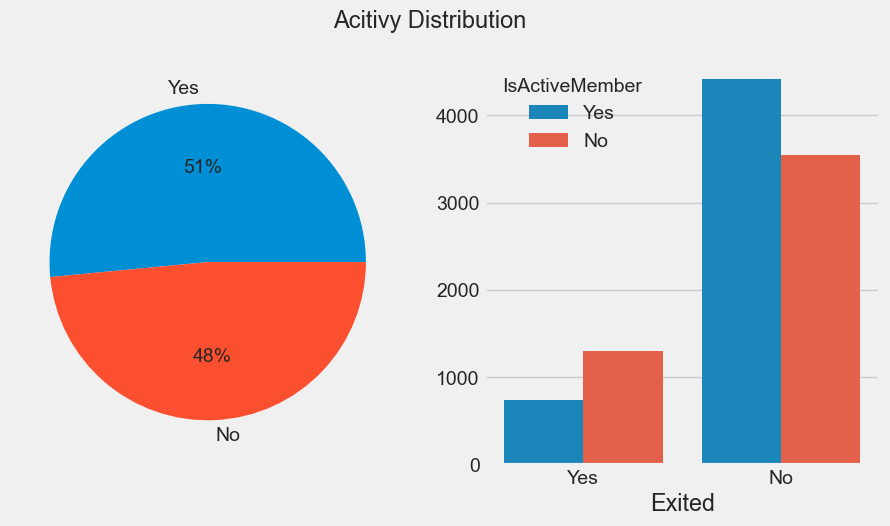

In [25]:
fig, (ax1, ax2) = plt.subplots(1,2,figsize=(10,5))
fig.suptitle('Acitivy Distribution',fontsize=17)

# pie chart
df['IsActiveMember'].value_counts().plot(kind='pie',ax=ax1,autopct='%d%%')
ax1.set_ylabel('')

# bar chart
sns.countplot(data=df,x='Exited',hue='IsActiveMember',ax=ax2)
ax2.set_ylabel('');

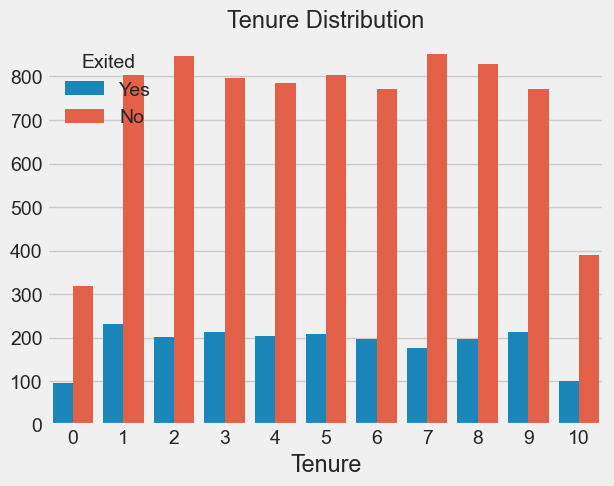

In [26]:
# bar chart
sns.countplot(data=df,x='Tenure',hue='Exited')
plt.title('Tenure Distribution',fontsize=17)
plt.ylabel('');

#### Observations - Categorical

- Data is very imbalanced. Only 20% of customers have exited.
- Most customers are from France but the most customers exiting per country basis is Germany.
- The sex ratio is close to 50%. But male customers are more probable to exit.
- Most customers use 1 or 2 products. Customers using more than 2 products are highly possible to exit. Also customers with exactly 2 products are more likely to not exit.
- Almost 70% of customers have credit cards.
- Active members ratio is almost the same. The customers exited have more non-active customers.
- Close to 20% from each tenure group exited.

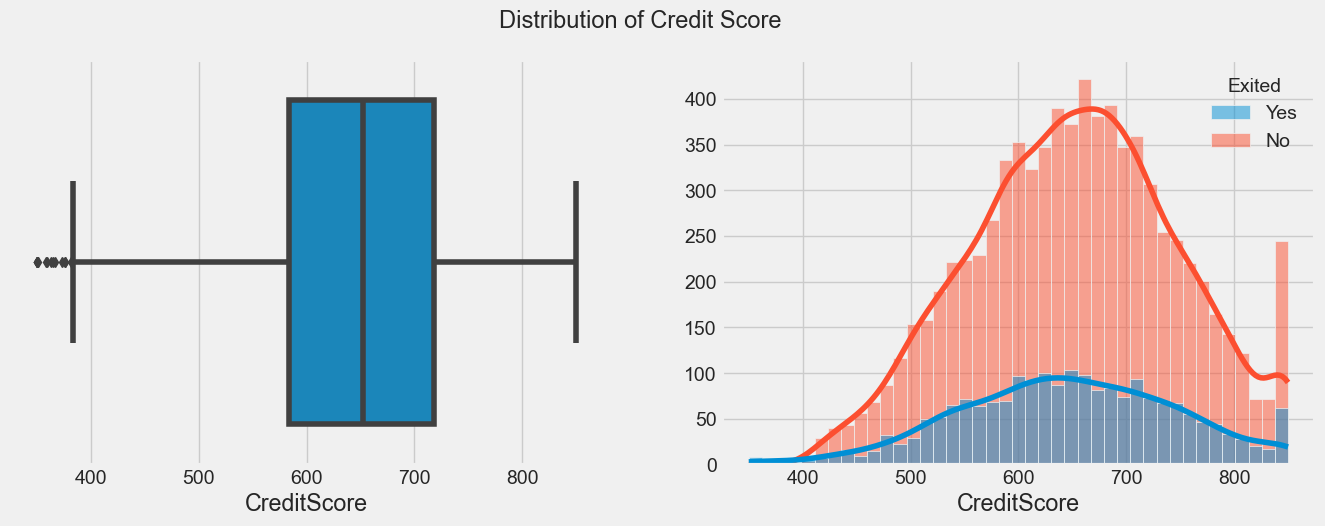

In [43]:
fig, (ax1, ax2) = plt.subplots(1,2,figsize=(15,5))
fig.suptitle('Distribution of Credit Score',fontsize=17)

# box chart
sns.boxplot(data=df,x='CreditScore',ax=ax1)
ax1.set_ylabel('')
ax1.set_xlabel('CreditScore');

# hist chart
sns.histplot(data=df,x='CreditScore',hue='Exited',kde=True,ax=ax2)
ax2.set_ylabel('');

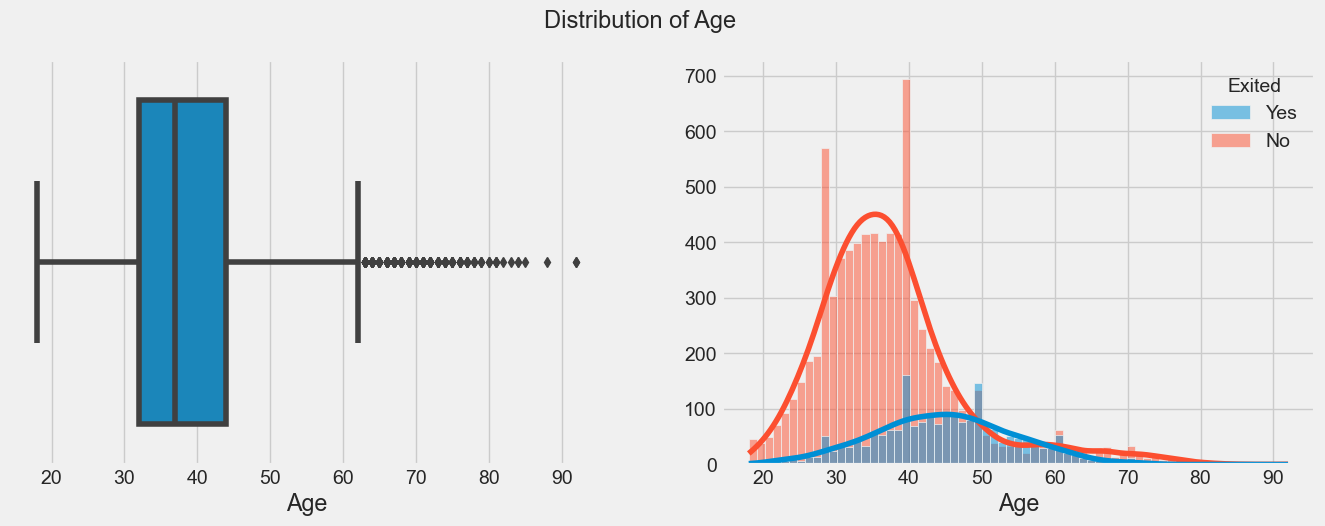

In [45]:
fig, (ax1, ax2) = plt.subplots(1,2,figsize=(15,5))
fig.suptitle('Distribution of Age',fontsize=17)

# box chart
sns.boxplot(data=df,x='Age',ax=ax1)
ax1.set_ylabel('')
ax1.set_xlabel('Age')

# hist chart
sns.histplot(data=df,x='Age',hue='Exited',kde=True,ax=ax2)
ax2.set_ylabel('');

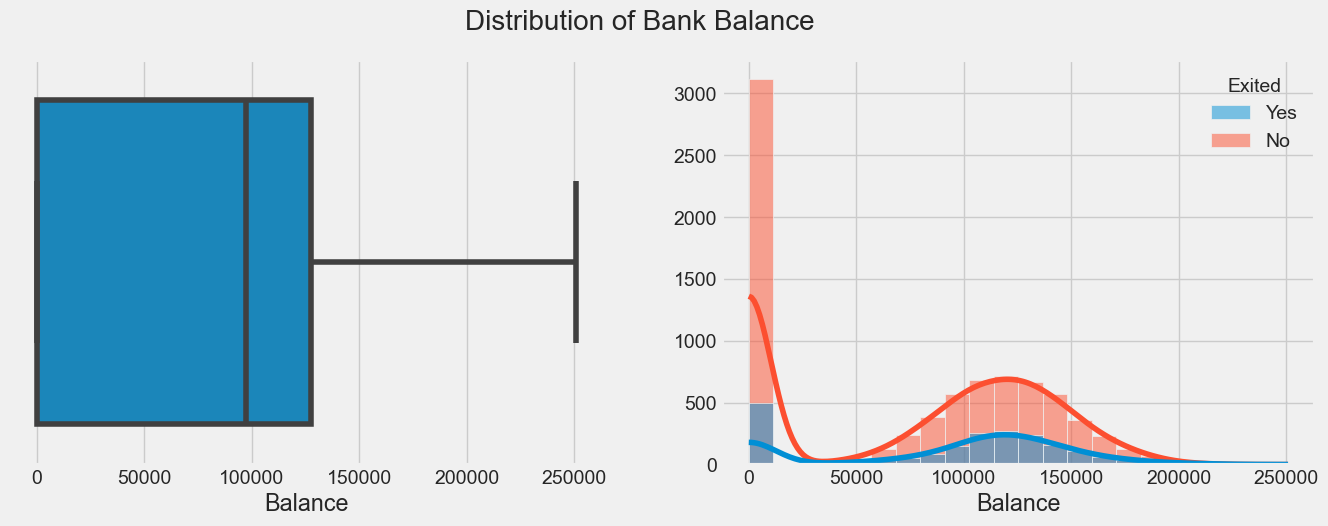

In [91]:
fig, (ax1, ax2) = plt.subplots(1,2,figsize=(15,5))
fig.suptitle('Distribution of Bank Balance',fontsize=20)

# box chart
sns.boxplot(data=df,x='Balance',ax=ax1)
ax1.set_ylabel('')
ax1.set_xlabel('Balance')

# hist chart
sns.histplot(data=df,x='Balance',hue='Exited',kde=True,ax=ax2)
ax2.set_ylabel('');

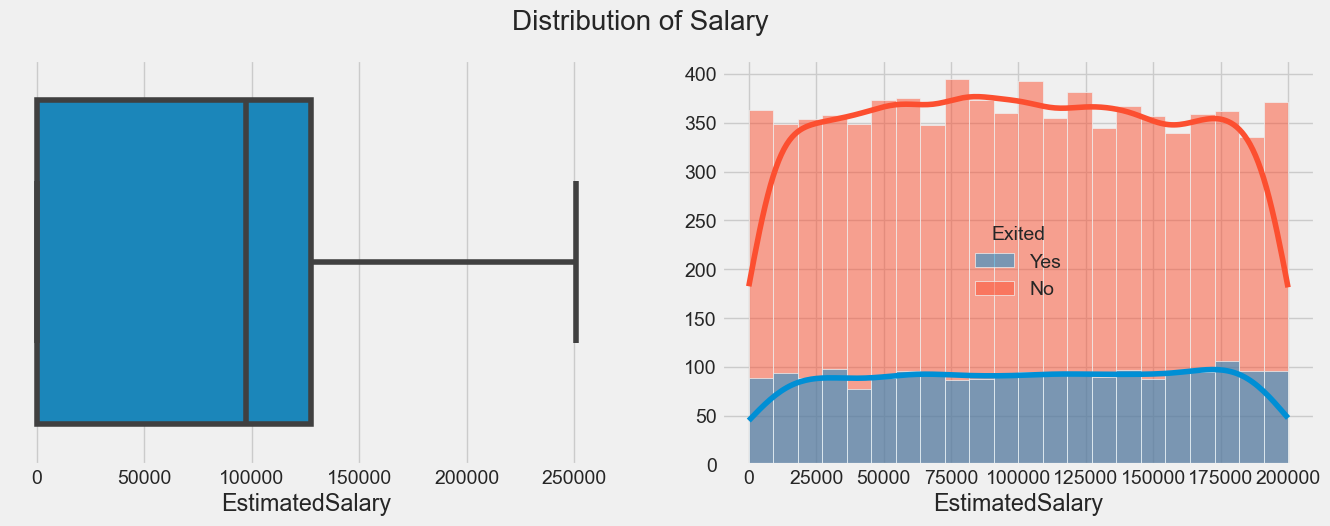

In [58]:
fig, (ax1, ax2) = plt.subplots(1,2,figsize=(15,5))
fig.suptitle('Distribution of Salary',fontsize=20)

# box chart
sns.boxplot(data=df,x='Balance',ax=ax1)
ax1.set_ylabel('')
ax1.set_xlabel('EstimatedSalary')

# hist chart
sns.histplot(data=df,x='EstimatedSalary',hue='Exited',kde=True,ax=ax2)
ax2.set_ylabel('');

#### Observations - Numerical

- `CreditScore` is highly normally distributed.
- `Age` is right skewed. Also observed that ages between 40-50 are more likely to exit.
- `Balance` is bi-modal. Most customers have no money or have 1,25,000 with them.
- `Salary` is uniformaly distributed.

## Multivariate Analysis

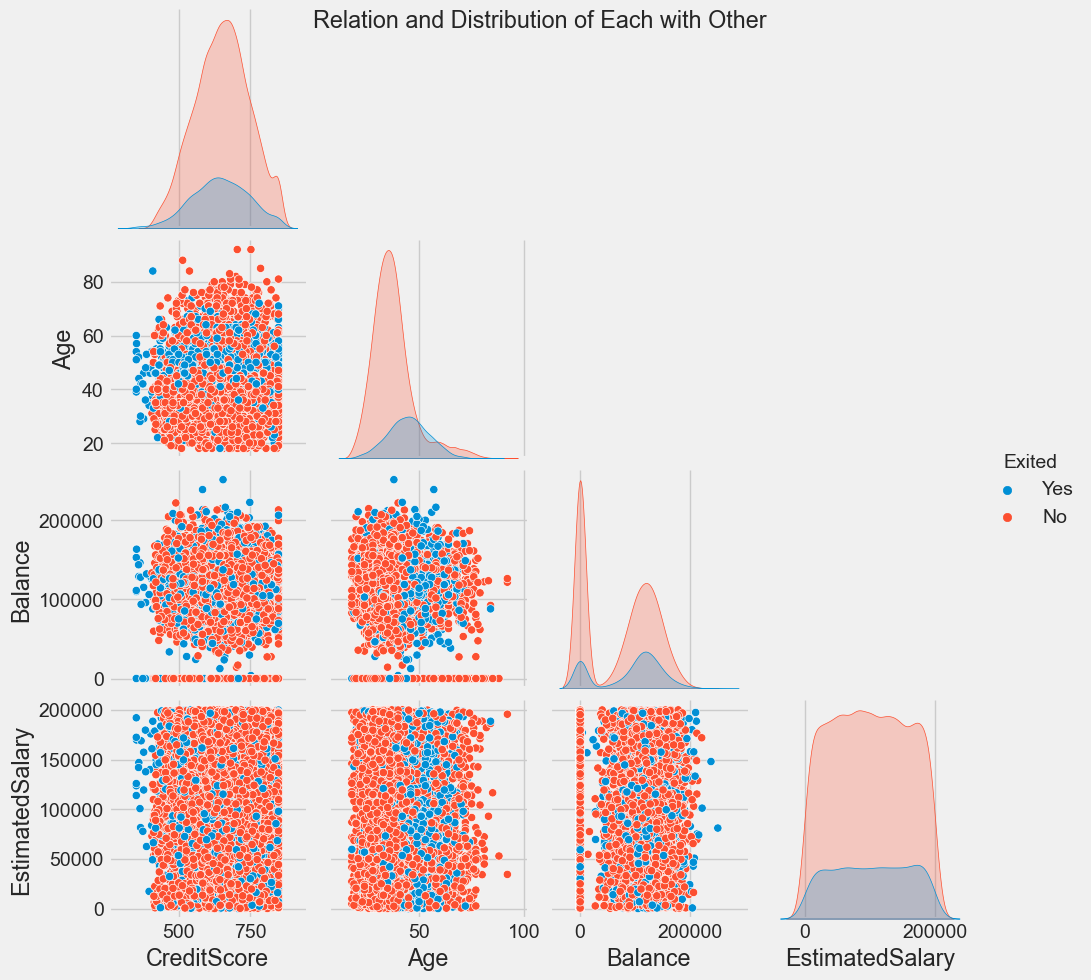

In [197]:
temp = df[['CreditScore', 'Age', 'Balance', 'EstimatedSalary', 'Exited']]

fig = sns.pairplot(data=temp,hue='Exited',corner=True)
fig.figure.suptitle('Relation and Distribution of Each with Other');

#### Observations

- Customers aged nearly 50 seem to show clear signs to exit irrespective of their `EstimatedSalary`, `Balance` and `CreditScore`.

## Feature Engineering

### Feature Tranformation

In [13]:
X = df.iloc[:,:-1]
y = df.iloc[:,-1]

from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test =  train_test_split(X,y,test_size=0.2,random_state=2002,stratify=y)

In [14]:
from sklearn.preprocessing import FunctionTransformer

# log transform over age
trf2 = FunctionTransformer(np.log1p)

In [15]:
X_test_transformed = X_test
X_train_transformed = X_train

In [16]:
X_train_transformed['Age'] = trf2.fit_transform(X_train['Age'])
X_test_transformed['Age'] = trf2.transform(X_test['Age'])

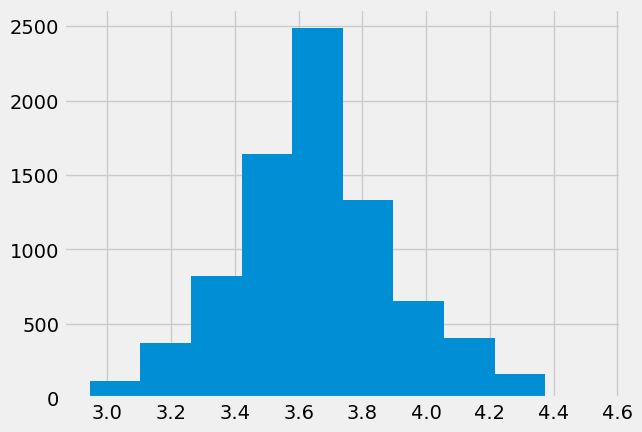

In [17]:
X_train_transformed['Age'].hist();

### Feature Encoding

In [18]:
X_train = pd.get_dummies(X_train_transformed,drop_first=True,dtype=np.int32)
X_test = pd.get_dummies(X_test_transformed,drop_first=True,dtype=np.int32)

In [19]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

y_train = le.fit_transform(y_train)
y_test = le.transform(y_test)

In [20]:
le.classes_

array(['No', 'Yes'], dtype=object)

In [21]:
y_test

array([0, 0, 1, ..., 1, 0, 0])

## Model Tuning and Selection

### Logistic Regression

In [374]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()

lr.fit(X_train,y_train)
lr.score(X_test,y_test)

0.7965

### Support Vector Machines

In [375]:
from sklearn.svm import SVC
svc = SVC()

svc.fit(X_train,y_train)
svc.score(X_test,y_test)

0.7965

### K Nearest Neighbours

In [394]:
from sklearn.neighbors import KNeighborsClassifier
knc = KNeighborsClassifier(n_neighbors=30)

knc.fit(X_train,y_train)
knc.score(X_test,y_test)

0.7965

### Random Forests

In [399]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier()

rfc.fit(X_train,y_train)
rfc.score(X_test,y_test)

0.8635

In [395]:
rfc.get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': 'sqrt',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': None,
 'verbose': True,
 'warm_start': False}

In [371]:
rfc.feature_names_in_

array(['CreditScore', 'Age', 'Tenure', 'Balance', 'NumOfProducts',
       'EstimatedSalary', 'Geography_Germany', 'Geography_Spain',
       'Gender_Male', 'HasCrCard_Yes', 'IsActiveMember_Yes'], dtype=object)

In [372]:
rfc.feature_importances_

array([0.14299128, 0.24219226, 0.08113441, 0.1431736 , 0.12661015,
       0.14906134, 0.02419842, 0.0142524 , 0.01806945, 0.01879445,
       0.03952226])

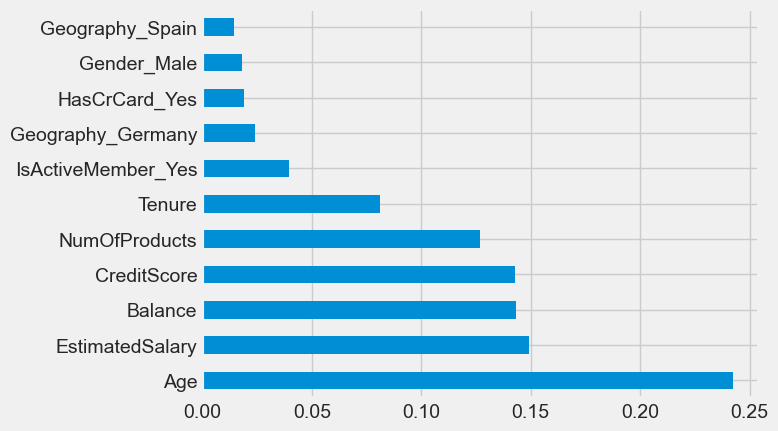

In [373]:
rfc_feat_imp = pd.Series(rfc.feature_importances_,index=rfc.feature_names_in_)
rfc_feat_imp.sort_values(ascending=False).plot(kind='barh');

In [401]:
from sklearn.metrics import classification_report,confusion_matrix
print(classification_report(y_test,rfc.predict(X_test)))

              precision    recall  f1-score   support

           0       0.88      0.96      0.92      1593
           1       0.75      0.50      0.60       407

    accuracy                           0.86      2000
   macro avg       0.81      0.73      0.76      2000
weighted avg       0.85      0.86      0.85      2000



In [403]:
print(confusion_matrix(y_test,rfc.predict(X_test)))

[[1524   69]
 [ 204  203]]


In [42]:
from sklearn.model_selection import GridSearchCV

In [421]:
param_grid = {'n_estimators': [900,1000],
               'max_features': ['log2'],
               'max_depth': [50],
              'max_samples':[None]
}

In [422]:
rfc = RandomForestClassifier()

rfc_grid = GridSearchCV(estimator = rfc, 
                        param_grid = param_grid, 
                        cv = 3, 
                        verbose=True, 
                        n_jobs = -1
)

In [423]:
rfc_grid.fit(X_train,y_train)

Fitting 3 folds for each of 9 candidates, totalling 27 fits


GridSearchCV(cv=3, estimator=RandomForestClassifier(), n_jobs=-1,
             param_grid={'max_depth': [8, 10, 50], 'max_features': ['log2'],
                         'max_samples': [None],
                         'n_estimators': [450, 900, 1500]},
             verbose=True)

In [424]:
rfc_grid.best_score_

0.8635001363764264

In [425]:
rfc_grid.best_params_

{'max_depth': 50,
 'max_features': 'log2',
 'max_samples': None,
 'n_estimators': 900}

### XGBoost

In [22]:
import xgboost as xgb

In [23]:
clf_xgb_vbest_params_GBClassifier(objective='binary:logistic',
                               seed=42)

clf_xgb_v1.fit(X_train,y_train,verbose=True,
            early_stopping_rounds=10,eval_metric='auc',
            eval_set=[(X_test, y_test)]
)

[0]	validation_0-auc:0.85839
[1]	validation_0-auc:0.86847
[2]	validation_0-auc:0.87299
[3]	validation_0-auc:0.87699
[4]	validation_0-auc:0.87759
[5]	validation_0-auc:0.87649
[6]	validation_0-auc:0.87865
[7]	validation_0-auc:0.87998
[8]	validation_0-auc:0.88084
[9]	validation_0-auc:0.88124
[10]	validation_0-auc:0.88084
[11]	validation_0-auc:0.87959
[12]	validation_0-auc:0.87949
[13]	validation_0-auc:0.87892
[14]	validation_0-auc:0.87793
[15]	validation_0-auc:0.87938
[16]	validation_0-auc:0.87770
[17]	validation_0-auc:0.87775
[18]	validation_0-auc:0.87727


XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

In [43]:
param_grid = {'gamma': [0,1,5],
               'learning_rate': [0,0.1,0.01],
               'max_depth': [1,5,10],
              'reg_lambda':[5,10,20],
              'scale_pos_weight':[1,5,10],
              'subsample':[0.5,0.9,1.5],
              'colsample_bytree':[0,0.5,1]
}

In [45]:
xgb_v2 = xgb.XGBClassifier()

xgb_grid = GridSearchCV(estimator = xgb_v2, 
                        param_grid = param_grid, 
                        cv = 3, 
                        verbose=True, 
                        n_jobs = -1
)

In [46]:
xgb_grid.fit(X_train,y_train)

Fitting 3 folds for each of 2187 candidates, totalling 6561 fits


GridSearchCV(cv=3,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     callbacks=None, colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None, device=None,
                                     early_stopping_rounds=None,
                                     enable_categorical=False, eval_metric=None,
                                     feature_types=None, gamma=None,
                                     grow_policy=None, importance_type=None,
                                     interaction_constraints=None,
                                     learning_rate=None,...
                                     max_leaves=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                                     multi_strategy=None, n_estimators=None,
                                     n_jobs=None, num_parallel_tree=None,
                                     random_state=None, ...),
             n_jobs=-1,
             param_grid={'colsample_bytree': [0, 0.5, 1], 'gamma': [0, 1, 5],
                         'learning_rate': [0, 0.1, 0.01],
                         'max_depth': [1, 5, 10], 'reg_lambda': [5, 10, 20],
                         'scale_pos_weight': [1, 5, 10],
                         'subsample': [0.5, 0.9, 1.5]},
             verbose=True)

In [48]:
xgb_grid.best_score_

0.8640002145268225

In [49]:
xgb_grid.best_params_

{'colsample_bytree': 1,
 'gamma': 1,
 'learning_rate': 0.1,
 'max_depth': 5,
 'reg_lambda': 5,
 'scale_pos_weight': 1,
 'subsample': 0.9}

In [50]:
clf_xgb_v2 = xgb.XGBClassifier(seed=42,objective='binary:logistic',
                               gamma=1.0,learning_rate=0.1,max_depth=5,
                               reg_lambda=5.0,scale_pos_weight=1,
                               subsample=0.9,colsample_bytree=1)

clf_xgb_v2.fit(X_train,y_train,
               early_stopping_rounds=10,
               eval_metric='auc',eval_set=[(X_test,y_test)])

[0]	validation_0-auc:0.85257
[1]	validation_0-auc:0.85922
[2]	validation_0-auc:0.85987
[3]	validation_0-auc:0.86345
[4]	validation_0-auc:0.86505
[5]	validation_0-auc:0.86723
[6]	validation_0-auc:0.87005
[7]	validation_0-auc:0.87076
[8]	validation_0-auc:0.87105
[9]	validation_0-auc:0.87389
[10]	validation_0-auc:0.87434
[11]	validation_0-auc:0.87478
[12]	validation_0-auc:0.87492
[13]	validation_0-auc:0.87548
[14]	validation_0-auc:0.87599
[15]	validation_0-auc:0.87648
[16]	validation_0-auc:0.87658
[17]	validation_0-auc:0.87730
[18]	validation_0-auc:0.87810
[19]	validation_0-auc:0.87753
[20]	validation_0-auc:0.87789
[21]	validation_0-auc:0.87781
[22]	validation_0-auc:0.87783
[23]	validation_0-auc:0.87808
[24]	validation_0-auc:0.87857
[25]	validation_0-auc:0.87957
[26]	validation_0-auc:0.87912
[27]	validation_0-auc:0.87970
[28]	validation_0-auc:0.87965
[29]	validation_0-auc:0.88003
[30]	validation_0-auc:0.87962
[31]	validation_0-auc:0.87959
[32]	validation_0-auc:0.87954
[33]	validation_0-au

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None, colsample_bytree=1,
              device=None, early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, feature_types=None, gamma=1.0, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=0.1, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=5,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=None,
              n_jobs=None, num_parallel_tree=None, random_state=None, ...)

In [53]:
clf_xgb_v2.best_score

0.8816836867684326

In [51]:
clf_xgb_v2.feature_names_in_

array(['CreditScore', 'Age', 'Tenure', 'Balance', 'NumOfProducts',
       'EstimatedSalary', 'Geography_Germany', 'Geography_Spain',
       'Gender_Male', 'HasCrCard_Yes', 'IsActiveMember_Yes'], dtype='<U18')

In [52]:
clf_xgb_v2.feature_importances_

array([0.02424686, 0.23131481, 0.02141649, 0.05488421, 0.22922933,
       0.02390775, 0.08314393, 0.03445147, 0.0533971 , 0.02488911,
       0.21911904], dtype=float32)

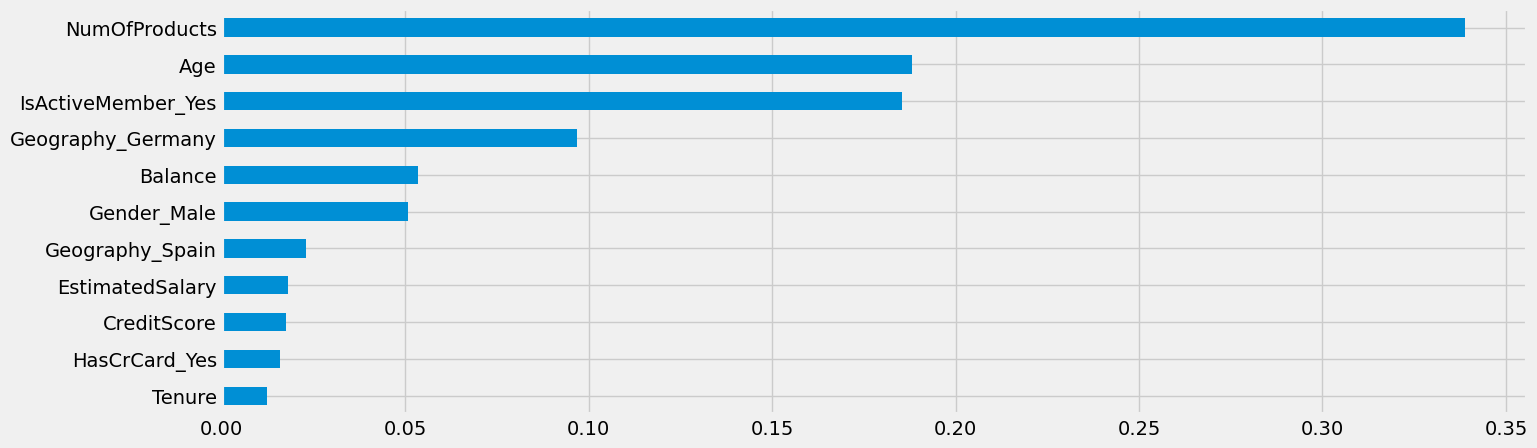

In [35]:
fig = plt.figure(figsize=(15, 5))

xgb_feat_imp = pd.Series(clf_xgb_v2.feature_importances_,clf_xgb_v2.feature_names_in_)
xgb_feat_imp.sort_values(ascending=True).plot(kind='barh');

In [64]:
import dtreeviz

In [73]:
viz_model = dtreeviz.model(clf_xgb_v2, tree_index=1,
                           X_train=X_train, y_train=y_train,
                           feature_names=X_train.columns.values.tolist(),
                           target_name=['Exited'], class_names=["Yes", "No"])

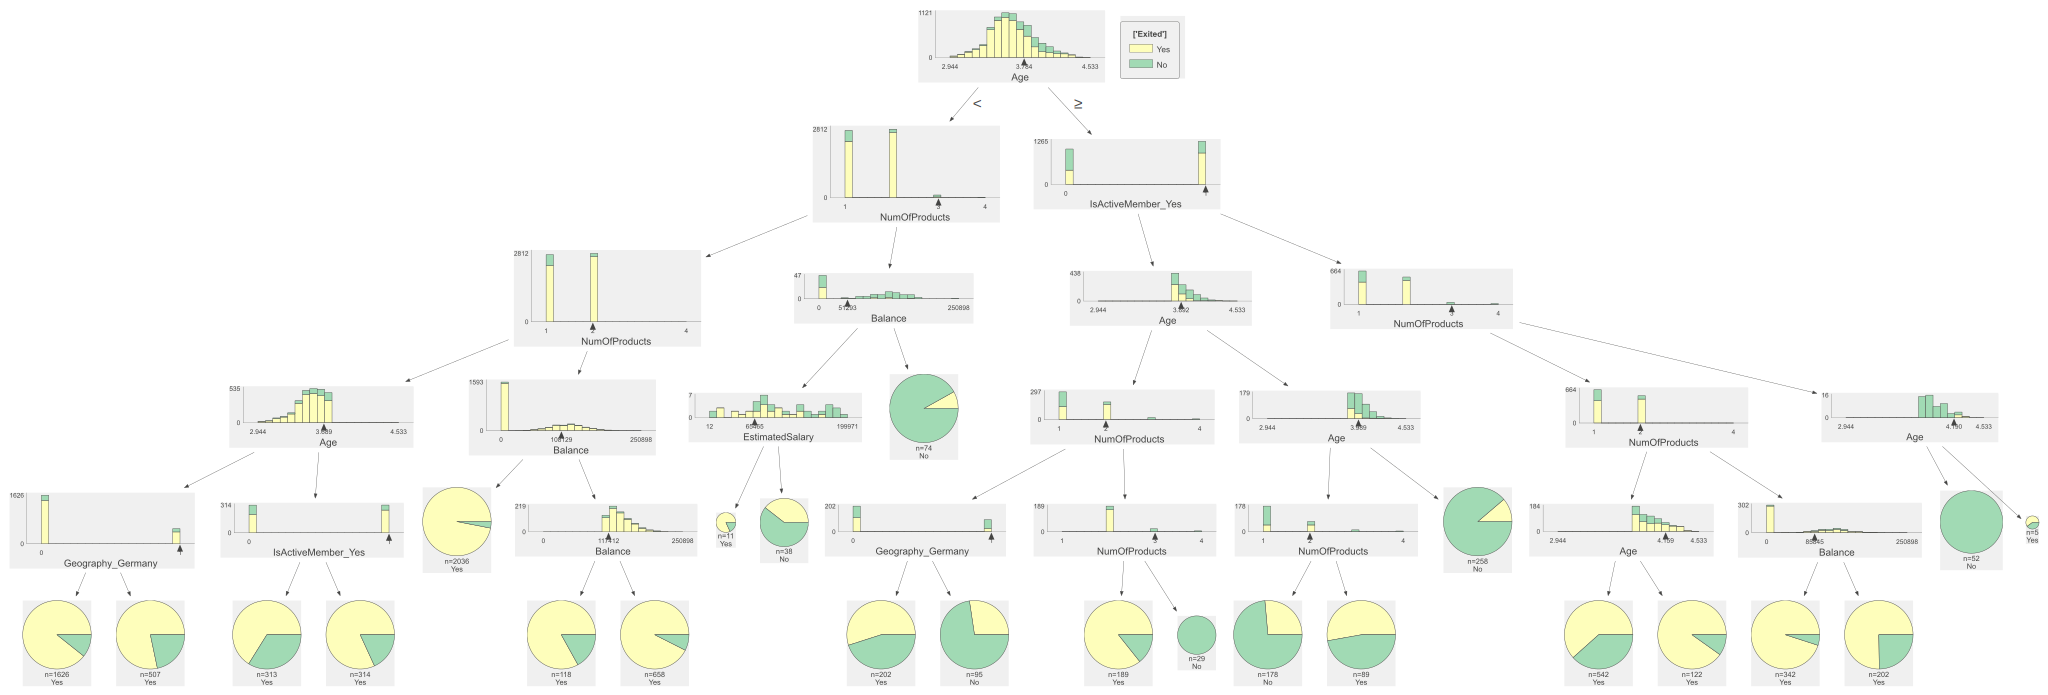

In [80]:
viz_model.view(scale=1.5)

## Final Model

**Best Model**

- `XGBoost`

**Best Parameters**

- `objective`=*binary:logistic*
- `gamma`=1.0
- `learning_rate`=0.1
- `max_depth`=5
- `reg_lambda`=5.0
- `scale_pos_weight`=1
- `subsample`=0.9
- `colsample_bytree`=1

**Best Score**

- `auc` : 0.8816836867684326

**Most Important Features**

1. NumOfProducts
2. Age
3. IsActiveMember_Yes
4. Geography_Germany

**Any Improvements**

- Play around with `Balance`